# ML Course 9 - Implementation on unsupervised techniques

This practice will cover k-Means and Hierarchical Clustering for customer segmentation.

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Importing the dataset

In [7]:
dataset = pd.read_csv('Complexity 1/Mall_Customers.csv')
dataset.sample(n=8)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
102,103,Male,67,62,59
195,196,Female,35,120,79
66,67,Female,43,48,50
160,161,Female,56,79,35
41,42,Male,24,38,92
42,43,Male,48,39,36
127,128,Male,40,71,95
143,144,Female,32,76,87


In [11]:
dataset['Genre'].replace({'Male':'blue', 'Female':'red'})

0      blue
1      blue
2       red
3       red
4       red
       ... 
195     red
196     red
197    blue
198    blue
199    blue
Name: Genre, Length: 200, dtype: object

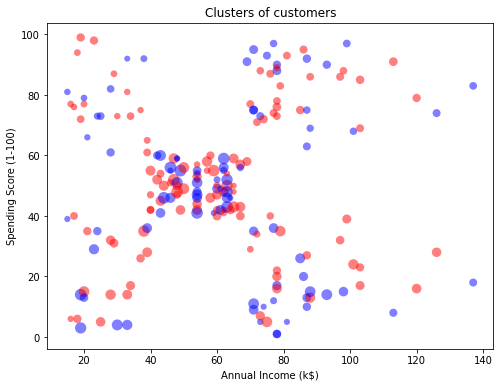

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'], s = dataset['Age']*2, c = dataset['Genre'].replace({'Male':'blue', 'Female':'red'}), alpha=0.5, lw=0)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [21]:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Exceptionnaly, no feature scaling will be done here since both features seems to have the same scale (both distributed on ranges of 100 units on their respective axis).

## Training the K-Means model on the dataset

In [134]:
k = 5

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [135]:
y_pred = kmeans.predict(X)
print(y_pred[:10])
np.unique(y_pred)

[3 1 3 1 3 1 3 1 3 1]


array([0, 1, 2, 3, 4])

## Visualising the clusters

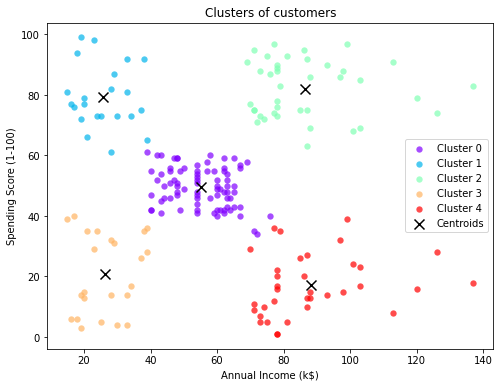

In [136]:
plt.figure(figsize=(8,6))
color_list = plt.cm.get_cmap('rainbow', k)
# color_list = plt.cm.hsv(np.linspace(0, 1, k))
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X.iloc[y_pred == i, 0], X.iloc[y_pred == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

# Plot final centroid of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, marker = 'x', c = 'black', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()

## Using the elbow method to find the optimal number of clusters

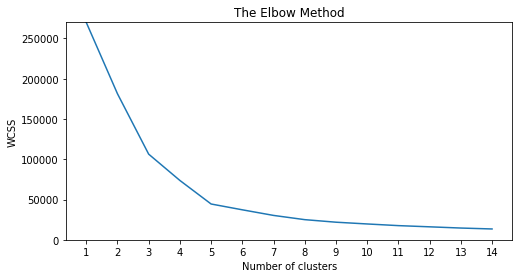

In [102]:
k_list = range(1,15)
wcss_list = []

# Computation of the WCSS for each k value of k_list
for k in k_list:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(k_list, wcss_list)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(k_list)
# plt.grid(axis='x')
plt.ylim([0, max(wcss_list)])
plt.show()

## Using the dendrogram to find the optimal number of clusters

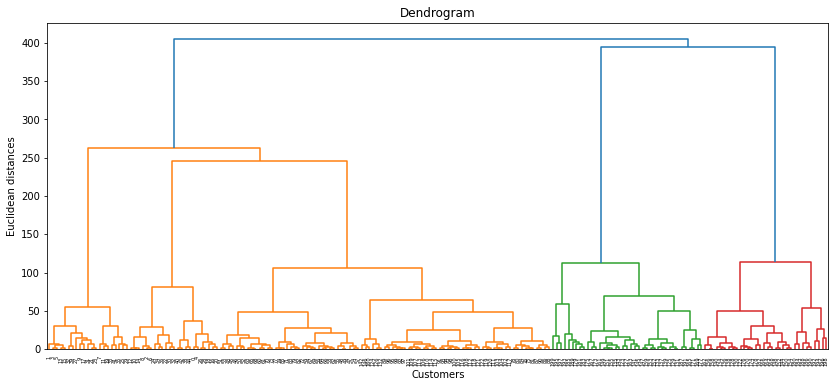

In [204]:
from scipy.cluster import hierarchy
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

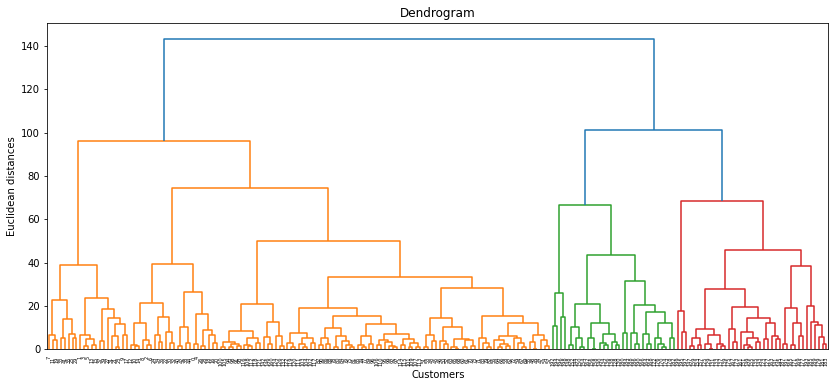

In [192]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'complete'))
# dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [199]:
k = 5

In [202]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## Visualising the clusters

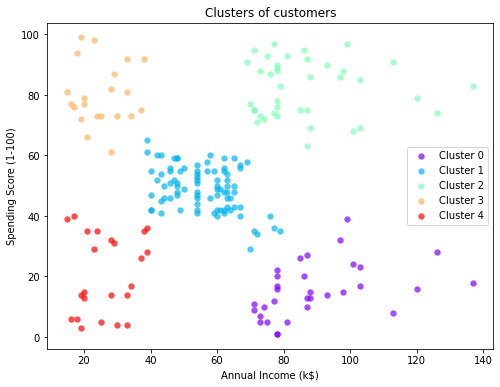

In [203]:
plt.figure(figsize=(8,6))
color_list = plt.cm.get_cmap('rainbow', k)
# color_list = plt.cm.hsv(np.linspace(0, 1, k))
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(X.iloc[y_hc == i, 0], X.iloc[y_hc == i, 1], s = 40, color = color_list(i), alpha=0.7, lw=0, label = 'Cluster ' + str(i))

plt.title('Clusters of customers')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()